In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [192]:
dataset = pd.read_excel('C:\\Users\\WesleyZhou\\Desktop\\CS559\\Assignment1\\data1.xlsx')

In [193]:
#split dataset into train and test

In [194]:
cols = ['Genre','Gross','Budget','Screens','Sequel','Sentiment','Views','Likes','Dislikes','Comments','Aggregate Followers']

In [195]:
X = dataset[cols].values
y = dataset['Ratings'].values

In [196]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=None)

In [197]:
dataX_test = X_test
datay_test = y_test

In [198]:
# for-loop from 1 to 10

In [199]:
Lasso_mean_result = []
Lasso_std_result = []
Ridge_mean_result = []
Ridge_std_result = []
Lasso_model = []
Ridge_model = []

In [200]:
for k in range(10):
    X = X_train
    y = y_train
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y,test_size = 0.3,random_state=None)
    X_validation = X_test1
    y_validation = y_test1
    
    # deal with missing value 
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
    imp.fit(X_train1)
    X_train1 = imp.transform(X_train1)
    imp.fit(X_validation)
    X_validation = imp.transform(X_validation)
    
    #deal with normalization
    min_max_scaler = preprocessing.MinMaxScaler()
    X_train1= min_max_scaler.fit_transform(X_train1)
    X_validation = min_max_scaler.transform(X_validation)
    
    # Using model
    reg1 = linear_model.Lasso(alpha = 0.1)
    reg1.fit(X_train1,y_train1)
    reg1_pred = reg1.predict(X_validation)
    Lasso_model.append(reg1)
    
    #mean and sd
#   Lasso_mean_result.append(np.mean(np.abs(y_validation-reg1_pred)))

#     Lasso_mean_result.append(mean_absolute_error(y_validation, reg1_pred))
#     Lasso_std_result.append(np.sqrt(np.mean((y_validation-reg1_pred)*(y_validation-reg1_pred))))
    
    Lasso_mean_result.append(mean_absolute_error(y_validation, reg1_pred))
    Lasso_mean = mean_absolute_error(y_validation, reg1_pred)
    
    sum1 = 0
    for f in range(len(reg1_pred)):
        ele1 = np.abs(reg1_pred[f]-y_validation[f])
        sum1 += (ele1-Lasso_mean)*(ele1-Lasso_mean)
    Lasso_std_result.append(np.sqrt(sum1/len(reg1_pred)))

    
    
       # Using model
    reg = linear_model.Ridge(alpha = .5)
    reg.fit(X_train1,y_train1)
    reg_pred = reg.predict(X_validation)
    Ridge_model.append(reg)
    
    #mean and sd
#     Ridge_mean_result.append(np.mean(np.abs(y_validation-reg_pred)))

#     Ridge_mean_result.append(mean_absolute_error(y_validation, reg_pred))
#     Ridge_std_result.append(np.sqrt(np.mean((y_validation-reg_pred)*(y_validation-reg_pred))))
    
    Ridge_mean_result.append(mean_absolute_error(y_validation, reg_pred))
    Ridge_mean = mean_absolute_error(y_validation, reg_pred)
    
    sum2 = 0
    for v in range(len(reg_pred)):
        ele2 = np.abs(reg_pred[v]-y_validation[v])
        sum2 += (ele2-Ridge_mean)*(ele2-Ridge_mean)
    Ridge_std_result.append(np.sqrt(sum2/len(reg_pred)))
    

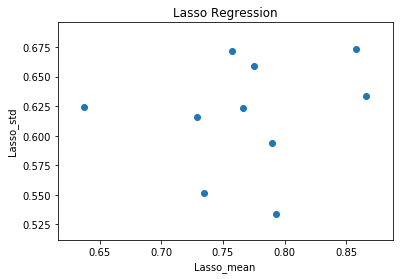

In [204]:
plt.scatter(Lasso_mean_result,Lasso_std_result)
plt.title("Lasso Regression")
plt.xlabel('Lasso_mean')
plt.ylabel('Lasso_std')
plt.show()

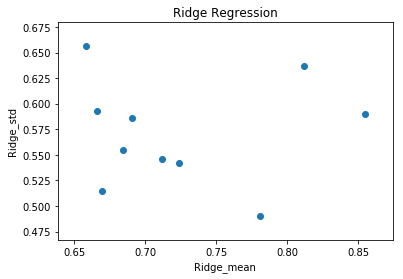

In [205]:
plt.scatter(Ridge_mean_result,Ridge_std_result)
plt.title("Ridge Regression")
plt.xlabel('Ridge_mean')
plt.ylabel('Ridge_std')
plt.show()

In [206]:
Lasso = []
for i in range(10):
    cur = []
    cur.append(Lasso_mean_result[i])
    cur.append(Lasso_std_result[i])
    cur.append(Ridge_mean_result[i])
    cur.append(Ridge_std_result[i])
    Lasso.append(cur)

result = pd.DataFrame(Lasso,columns=['Lasso_mean_result','Lasso_std_result','Ridge_mean_result','Ridge_std_result'])
result

,Lasso_mean_result,Lasso_std_result,Ridge_mean_result,Ridge_std_result
0,0.637245,0.624193,0.657931,0.655961
1,0.775182,0.658688,0.684542,0.554775
2,0.728517,0.616173,0.690354,0.586105
3,0.756979,0.671527,0.665984,0.592957
4,0.866217,0.634052,0.811990,0.637047
5,0.734475,0.551599,0.669693,0.514862
6,0.790069,0.593962,0.711634,0.546218
7,0.793349,0.534030,0.781148,0.490399
8,0.857526,0.673753,0.854542,0.589856
9,0.766327,0.623375,0.723656,0.542137


In [14]:
# As we can see the best model is the model which has the lowest std and mean

In [207]:
Lasso_current = Lasso_model[0]
Ridge_current = Ridge_model[1]

In [208]:
#For test dateset

In [209]:
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
imp.fit(dataX_test)
dataX_test = imp.transform(dataX_test)

min_max_scaler = preprocessing.MinMaxScaler()
dataX_test= min_max_scaler.fit_transform(dataX_test)

In [210]:
Lasso_pred = Lasso_current.predict(dataX_test)
Ridge_pred = Ridge_current.predict(dataX_test)

In [211]:
from sklearn.metrics import mean_squared_error

In [212]:
Lasso_error = mean_squared_error(datay_test, Lasso_pred)
Ridge_error = mean_squared_error(datay_test, Ridge_pred)

In [213]:
Lasso_error

0.999829081632653

In [214]:
Ridge_error

0.7962671309405739

In [215]:
# Report for assignment 1 question 5

In [216]:
# For Assignment 1 Question 5, i choose the first dataset, And my idea is: 
#Step 1: Split the original dataset into train and test dataset
#Step 2: Write a for-loop to go through 10 times of the algorithm
#Step 3: In the for-loop, I first split the train dataset into train and validation dataset, second using mean value to deal with 
#       the missing value. Third, scaling the data using MinMaxScaler. Finally, fit the Lasso and Ridge model, and predict the result
#       For 1o Lasso and Ridge mean and std values, i stored them in different arrays, and also for 10 different models, i stored
#       in different arrays.
#Step 4:I use the table and charts to show the value of mean and std results and distribution of them
#Step 5:Choose the best model of both Lasso and Ridge model, and predict the test dataset error value

#Notes: Because the prof said, we don't need to use all the features, so i just choose some of the features based on my own knowledge
#       Most of the packages in my code is from the skicit-learn
